In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [6]:
# 行列数据标注
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()
df.head(5)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<function matplotlib.pyplot.legend(*args, **kwargs)>

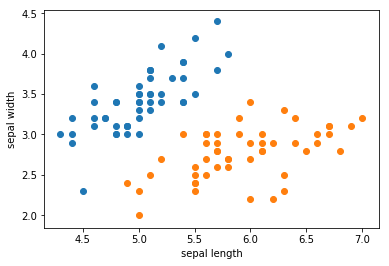

In [7]:
# 数据可视化展示
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend

In [9]:
# 选取特征和标签
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y]) # 将label中的0标签替换为-1

In [10]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    # 类创建对象时自动执行，进行初始化操作
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)  # 初始化权重
        self.b = 0  # 初始化截距项
        self.l_rate = 0.1  # 学习步长
        # self.data = data

    # 定义符号函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X) # 更新权重
                    self.b = self.b + self.l_rate * y # 更新步长
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

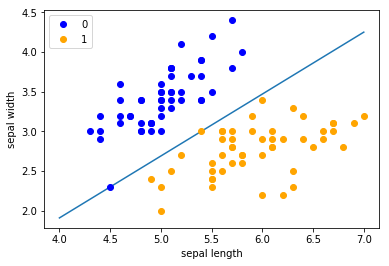

In [11]:
perceptron = Model()  # 类的实例化，创建一个对象
perceptron.fit(X, y)  # 调用类的fit方法

# 可视化超平面
x_points = np.linspace(4, 7, 10)  # linspace返回固定间隔的数据
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 误差分类点到超平面的距离
plt.plot(x_points, y_)

# 可视化展示
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()